In [23]:

import os
import zipfile
import urllib.parse
import requests
import tempfile

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.

DATA_SOURCE_MAPPING = 'cites-wildlife-trade-database:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F11299%2F15671%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20250415%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20250415T063213Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D039895025deab430ced8fc8648cd6b860889c17b7b85d41e0351c10abb70c65ca588292104b78800c078e685304a4359281e8d25d7f56be07d660b5a1d54ca4ad35c25af13f5a439cf7e67e37e4f6af77c9c868afbf379fb69b2e9ef5057db789e5bf3c12379fa04e5eaa03baec35a2a0d8bc6c4a7fdab863bfa44799a5ff00ba61458c08ab429c7fcb88f1ebef3b39170a9d9faa58d351a2ec0397d2a32d552031c618eb0ef3747d1bb651e8c3318f0d55e63125398483e6a596ecb1c2aa94050ef796c14675c03c886f85855f7fcfd066cf97a9e3fe23da79cbb9ae777b96f2bde8e18832a3b4b3e3dbf7e4f9672a4f961fcde42d7d2e6e2820fae1468d890'

KAGGLE_INPUT_PATH = "" #os.path.join(tempfile.gettempdir(), 'kaggle_input')

data_source_mappings = DATA_SOURCE_MAPPING.split(',')
for data_source_mapping in data_source_mappings:
    directory, download_url = data_source_mapping.split(':')
    download_url = urllib.parse.unquote(download_url)
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    os.makedirs(destination_path, exist_ok=True)
    print(f'Downloading and uncompressing: {directory}')
    if download_url.find('.zip')>-1:
        with tempfile.NamedTemporaryFile(suffix='.zip') as temp:
            response = requests.get(download_url)
            temp.write(response.content)
            with zipfile.ZipFile(temp.name, 'r') as zip_ref:
                zip_ref.extractall(destination_path)
    print(f'Downloaded and uncompressed: {directory}')

print('Data source import complete')


Downloaded and uncompressed: cites-wildlife-trade-database
Data source import complete


# Background

Human-driven extinction of species is a serious and ongoing crisis. A major contributing factor to this is the capture and slaughter of wild animals and plant life for trade. In an effort to combat this, the CITEs organization was created to monitor and regulate the international trade of protected species. The purpose of this case study is to analyze data collected by CITEs and come up with reccomendations based on insights from the analysis.

Metadata: https://trade.cites.org/cites_trade_guidelines/en-CITES_Trade_Database_Guide.pdf

Source: https://trade.cites.org/en/cites_trade/#

# Business Task

Analyze CITEs data and reccomend strategies to prevent the endagermnent of protected species.

# Importing Libraries & Datasets

In [12]:
# import libraries
# %pip install matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

In [24]:
# store the data
trade = pd.read_csv(os.path.join(destination_path, "comptab_2018-01-29 16_00_comma_separated.csv"))

# glimpse the data
print(trade.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67161 entries, 0 to 67160
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        67161 non-null  int64  
 1   App.                        67161 non-null  object 
 2   Taxon                       67161 non-null  object 
 3   Class                       46937 non-null  object 
 4   Order                       67104 non-null  object 
 5   Family                      66700 non-null  object 
 6   Genus                       65702 non-null  object 
 7   Importer                    67090 non-null  object 
 8   Exporter                    66588 non-null  object 
 9   Origin                      25643 non-null  object 
 10  Importer reported quantity  31866 non-null  float64
 11  Exporter reported quantity  44021 non-null  float64
 12  Term                        67161 non-null  object 
 13  Unit                        640

### Personalization

In [26]:
# personalized theme for matplotlib
def my_theme(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.grid(False)  # Remove grid lines
    ax.set_facecolor('white')  # Set background color to white
    ax.tick_params(axis='x', which='both', bottom=True, top=False)
    ax.tick_params(axis='y', which='both', left=True, right=False)

# Processing the Data

### Cleaning

In [28]:
# display first 10 rows
trade.head(10)

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
0,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,TR,NL,CZ,NaN,1.0,bodies,NaN,T,C
1,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,XV,RS,RS,NaN,1.0,bodies,NaN,Q,O
2,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,NaN,NaN,43.0,feathers,NaN,S,W
3,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,NaN,NaN,43.0,specimens,NaN,S,W
4,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,DK,IS,NaN,700.0,NaN,specimens,NaN,S,W
5,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,XV,RS,RS,NaN,1.0,bodies,NaN,Q,O
6,2016,I,Harpia harpyja,Aves,Falconiformes,Accipitridae,Harpia,BR,FR,NaN,NaN,12.0,feathers,NaN,S,C
7,2016,I,Harpia harpyja,Aves,Falconiformes,Accipitridae,Harpia,BR,FR,NaN,NaN,4.0,feathers,NaN,S,U
8,2016,I,Harpia harpyja,Aves,Falconiformes,Accipitridae,Harpia,BR,FR,NaN,NaN,2.0,feathers,NaN,S,W
9,2016,I,Acipenser brevirostrum,Actinopteri,Acipenseriformes,Acipenseridae,Acipenser,CH,DE,NaN,NaN,4.0,live,NaN,T,C


There are clearly missing values within just the first 10 rows. It is a good idea to count missing values for every column individually.

In [30]:
# count missing values
trade.isna().sum()

Year                              0
App.                              0
Taxon                             0
Class                         20224
Order                            57
Family                          461
Genus                          1459
Importer                         71
Exporter                        573
Origin                        41518
Importer reported quantity    35295
Exporter reported quantity    23140
Term                              0
Unit                          60759
Purpose                        6059
Source                          544
dtype: int64

It is apparent from the data frame that there are likely more missing values that are improperly formatted as empty strings. These empty strings should be converted to nulls for consistency.

To be thorough, empty strings will be replaced throughout the entire data frame.

In [32]:
import numpy as np

# list all species of unidentified origin
trade.replace("", np.nan, inplace=True)

# count missing values
print(trade.isna().sum())

Year                              0
App.                              0
Taxon                             0
Class                         20224
Order                            57
Family                          461
Genus                          1459
Importer                         71
Exporter                        573
Origin                        41518
Importer reported quantity    35295
Exporter reported quantity    23140
Term                              0
Unit                          60759
Purpose                        6059
Source                          544
dtype: int64


The empty strings have been properly formatted as nulls; and, as expected, the number of nulls has increased for several columns.

Next, the nulls will be adressed.

Upon taking a closer look at the data frame, it appears that the quantity traded is either reported by the Importer or the Exporter, but not both. This is a perfect scenario for the coalesce function.

In [34]:
# coalesce importer and exporter reported quantity
trade['Quantity'] = trade[['Importer reported quantity', 'Exporter reported quantity']].bfill(axis=1).iloc[:, 0]

# drop redundant columns
trade.drop(columns=['Importer reported quantity', 'Exporter reported quantity'], inplace=True)

# count missing values
trade.isna().sum()

Year            0
App.            0
Taxon           0
Class       20224
Order          57
Family        461
Genus        1459
Importer       71
Exporter      573
Origin      41518
Term            0
Unit        60759
Purpose      6059
Source        544
Quantity        0
dtype: int64

The "Quantity" column is complete.

Another quick fix is the "Genus" column. The genus of a species is also the first word in its Taxon; and, the "Taxon" column is complete, so it can serve as a reference.

In [38]:
# duplicate Taxon column
trade['duplicate'] = trade['Taxon']

# generate complete Genus column
trade[['Genus', 'species']] = trade['duplicate'].str.split(' ', n=1, expand=True)
trade = trade.drop(columns=['species', 'duplicate'])

# count missing values
print(trade.isna().sum())

Year            0
App.            0
Taxon           0
Class       20224
Order          57
Family        461
Importer       71
Exporter      573
Origin      41518
Term            0
Unit        60759
Purpose      6059
Source        544
Quantity        0
Genus           0
dtype: int64


The remaining columns are not as simple to address. "Importer", "Exporter", "Origin", "Purpose", and "Source" could be predicted based on the available information, but that will be unnecessary and likely inaccurate.

"Class", "Order", and "Family" can be scraped from the internet based on "Taxon", but this will also be unnecessary.

Finally, the "Unit" column is mostly nulls because most of the quantities are in counts rather than physical units, so this is okay.

### Filtering

The main assumption of this analysis is that removing species from the wild or slaughtering them for goods directly contributes to their endangerment, and trading or slaughtering species already in captivity does not directly contribute to their endangerment.

In [40]:
# filter out all species born in captivity or artificially grown in a controlled environment
trade = trade[trade['Source'].isin(['W', 'X'])]

The only records that have been kept are those that *explicitly* state that the species was taken from the wild (Purpose = W) or the ocean (Purpose = X); and, for the purposes of this analysis, the ocean can be considered equivalent to the wild so this column will now be dropped.

The "Year" column will also be dropped because it does not have any (or very little) information— all of the data is from 2016 with only a few records from 2017.

Finally, the columns "Class", "Order", "Family", and "Origin" will be dropped because they will not be necessary.

In [42]:
# drop columns
trade = trade.drop(columns=['Source', 'Year', 'Class', 'Order', 'Family', 'Origin'])

# count missing values
print(trade.isna().sum())

App.            0
Taxon           0
Importer       20
Exporter      535
Term            0
Unit        19537
Purpose        50
Quantity        0
Genus           0
dtype: int64


The remaining nulls will be dropped (aside from the "Unit" column).

In [44]:
# drop nulls
trade = trade.dropna(subset=[col for col in trade.columns if col != 'Unit'])

# count missing values
print(trade.isna().sum())

App.            0
Taxon           0
Importer        0
Exporter        0
Term            0
Unit        18978
Purpose         0
Quantity        0
Genus           0
dtype: int64


# Analysis & Visualization

Importers drive trade, because without their demand there woudld be no incentive for exporters to collect goods in the first place.

So, who are the largest importers?

In [46]:
# 10 most frequent Importers
imp = (
	trade.groupby('Importer')
	.size()
	.reset_index(name='count')
	.sort_values(by='count', ascending=False)
	.head(10)
	.sort_values(by='count')
)

# preserve order in plot
imp['Importer'] = pd.Categorical(imp['Importer'], categories=imp['Importer'].unique(), ordered=True)

/tmp/ipykernel_257818/1056843185.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=imp, x='Importer', y='count', palette='inferno')


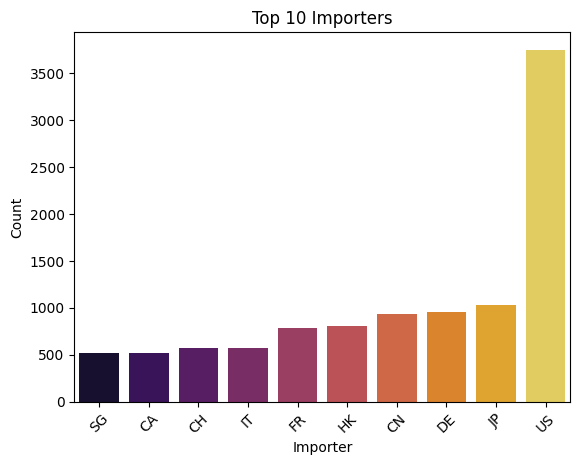

In [48]:
# bar plot
sns.barplot(data=imp, x='Importer', y='count', palette='inferno')
plt.xticks(rotation=45)
plt.xlabel('Importer')
plt.ylabel('Count')
plt.title('Top 10 Importers')
plt.show()

The U.S. is by far the largest importer of wildlife goods with almost *double* the imports of Japan and Germany combined (second and third largest, respectively).

Which species are the most in danger?

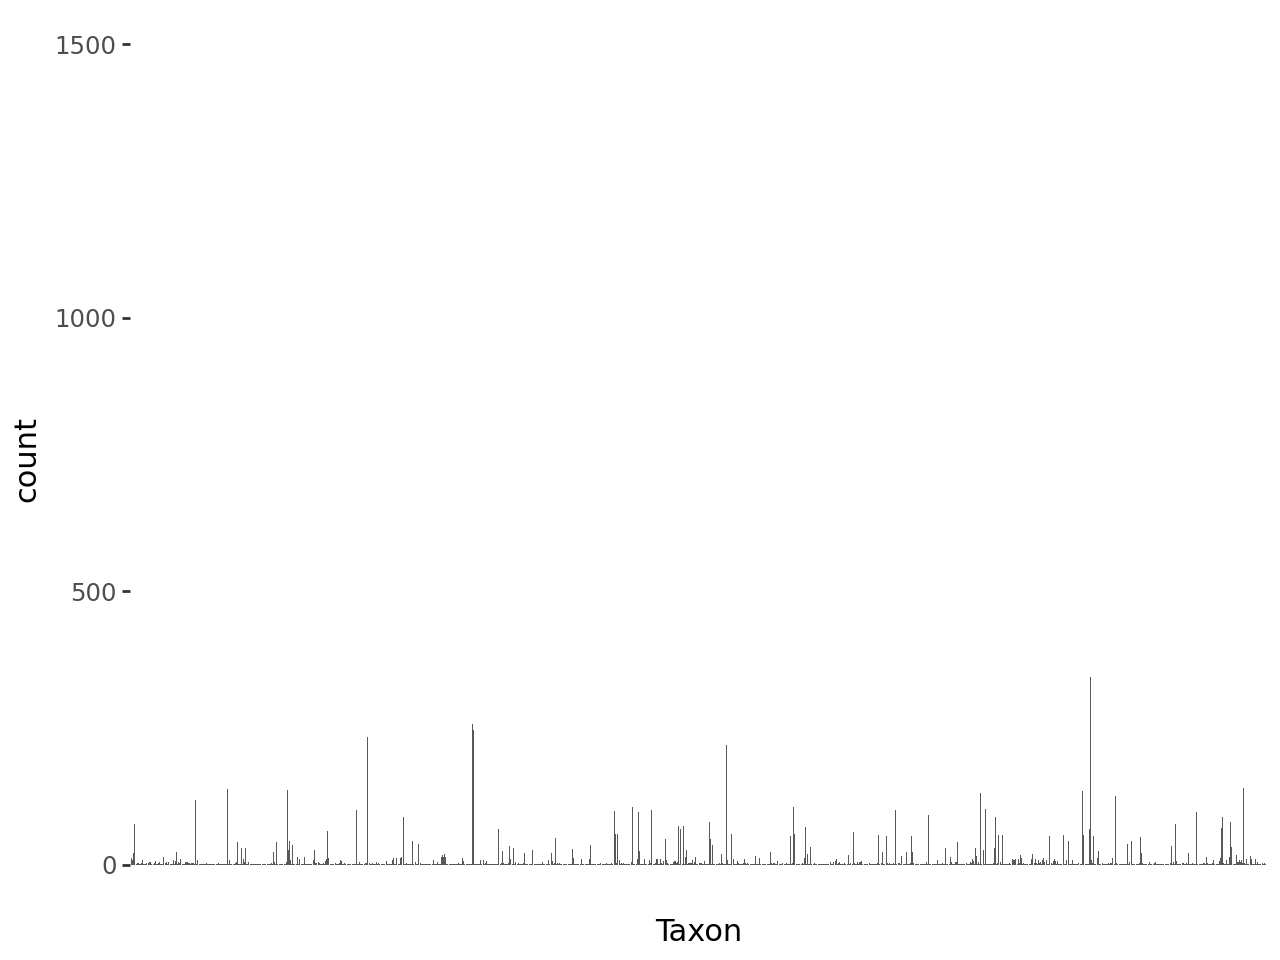

In [53]:
# %pip install plotnine

# Import plotnine
from plotnine import ggplot, aes, geom_col, theme, element_blank

# distribution of species
(
    trade.groupby('Taxon')
    .size()
    .reset_index(name='count')
    .pipe(
        lambda df: ggplot(df)
        + geom_col(aes(x='Taxon', y='count'))
        + theme(axis_text_x=element_blank(), axis_ticks_x=element_blank())
    )
)

It looks like there are a few different species that are being traded more than 250 times a year.

In [55]:
# species with more than 250 records
endangered = (
	trade.groupby('Taxon')
	.size()
	.reset_index(name='count')
	.sort_values(by='count', ascending=False)
	.query('count > 250')
)

# display dataframe
print(endangered)

                           Taxon  count
144   Alligator mississippiensis   1483
1529          Python reticulatus   1083
1788            Varanus salvator    876
1783           Varanus niloticus    668
379     Caiman crocodilus yacare    460
1067          Loxodonta africana    431
1525          Python brongersmai    344
1791             Vicugna vicugna    273
544         Crocodylus niloticus    257


What is the purpose for capturing these species?

In [57]:
# distribution of purpose for each species
purp_summary = (
    trade[trade['Taxon'].isin(endangered['Taxon'])]
    .groupby(['Taxon', 'Purpose'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count')
)

# preserve order in plot
purp_summary['Purpose'] = pd.Categorical(purp_summary['Purpose'], categories=purp_summary['Purpose'].unique(), ordered=True)

In [65]:
# bar plot
from plotnine import ggplot, aes, geom_col, facet_wrap, scale_fill_manual

(
    ggplot(purp_summary, aes(x='Purpose', y='count', fill='Purpose'))
    + geom_col()
    + facet_wrap('~Taxon')
    + scale_fill_manual(values=cm.inferno.colors[:10])
)

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

There appears to be a trend where commerical purposes is the most commonly cited reason for trading a species or its derivatives.

Appendix refers to the degree of protection for a species— Appendix-I species being the most protected.

So, what is the designation of each of the above species?

In [67]:
# list appendix for each species
for species in endangered['Taxon']:
    print(trade[trade['Taxon'] == species][['Taxon', 'App.']].iloc[0])

Taxon    Alligator mississippiensis
App.                             II
Name: 10045, dtype: object
Taxon    Python reticulatus
App.                     II
Name: 55577, dtype: object
Taxon    Varanus salvator
App.                   II
Name: 63346, dtype: object
Taxon    Varanus niloticus
App.                    II
Name: 62516, dtype: object
Taxon    Caiman crocodilus yacare
App.                           II
Name: 13099, dtype: object
Taxon    Loxodonta africana
App.                      I
Name: 1928, dtype: object
Taxon    Python brongersmai
App.                     II
Name: 54858, dtype: object
Taxon    Vicugna vicugna
App.                   I
Name: 554, dtype: object
Taxon    Crocodylus niloticus
App.                        I
Name: 1036, dtype: object


Many of these species are currently designated as Appendix-II, and the species towards the bottom of the list are mostly Appendix-I species.

What goods are being collected from these species?

In [69]:
# list all goods traded more than 50 times for each species
result = (
	trade[trade['Taxon'].isin(endangered['Taxon'])]
	.groupby(['Taxon', 'Term'])
	.size()
	.reset_index(name='count')
	.query('count > 50')
)

print(result)

                          Taxon                      Term  count
4    Alligator mississippiensis                  garments     90
6    Alligator mississippiensis  leather products (large)     94
7    Alligator mississippiensis  leather products (small)    924
15   Alligator mississippiensis               skin pieces     90
16   Alligator mississippiensis                     skins    137
18   Alligator mississippiensis                 specimens     79
21     Caiman crocodilus yacare                  garments     65
24     Caiman crocodilus yacare  leather products (small)    305
33         Crocodylus niloticus  leather products (small)    118
39         Crocodylus niloticus                  trophies     51
63           Loxodonta africana                  trophies     64
65           Loxodonta africana                     tusks     64
69           Python brongersmai  leather products (small)    259
76           Python reticulatus                  garments    111
78           Python retic

# Conclusion & Reccomendations

Almost all of the species that are being widely traded are reptiles (alligators, crocodiles, snakes, and monitors). These reptiles are highly sought after for their scaly leather, which is seen as a luxurious material for making clothing and accessories. The remaining species were the vicuña, hunted for their hide, and the african elphant, notoriously hunted for their ivory-rich tusks.

Ultimately, this dataset was limited to legal activity in the international wildlife trade. The truly endangered species are being threatened by the significant black market activity around the globe. In any case, the following reccomendations serve to balance out the legal market and prevent species from becoming endangered.

### Reccomendations

- Limit U.S. wildlife and wildlife derivative imports to 1000 maximum annually.
- Increase import and export taxes on the following goods:
    - leathers, hides, or trophies derived from any species of the following genera:
        - Alligator
        - Crocodylus
        - Caiman
        - Varanus
        - Python
    - elephant tusks
    - elephant trophies
    - vicuña cloth
    - vicuña garments
- Move the following Appendix-II species to Appendix III:
    - Alligator mississippiensis (American Alligator)
    - Python reticulatus (Reticulated Python)
    - Varanus salvator (Asian Water Monitor)
    - Varanus niloticus (Nile Monitor)
    - Caiman crocodilus yacare (Spectacled Caiman)
    - Python brongersmai (Blood Python)
- Outlaw the capture or slaughter of the following species:
    - Loxodonta africana (African Elephant)
    - Vicugna vicugna (Vicuña)
    - Crocodylus niloticus (Nile Crocodile)

It is our duty to protect all life on this Earth, not take it away. As the most technologically advanced species on this planet, we have both the power and **responsibility** to safe guard life.

![LittleReptile](https://cf.ltkcdn.net/small-pets/images/orig/259567-1600x1030-intelligent-characteristics-reptiles.jpg)